In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("files/results.csv")

##  תרגיל 1

###### מה ההסתברות של ניצחון של הקבוצה המארחת בעונת 2008 ? 

In [180]:
season2008 = df[df["Season"] == "2008-09"]
print(f"{(season2008['FTR'] == 'H').mean() * 100:.5f}%")

45.52632%


## תרגיל 2

###### צייר את ההסתברות לניצחון של הקבוצה המארחת לאורך השנים.
###### ציר ה x - העונה
###### ציר ה y - ההסתברות לניצחון של הקבוצה המארחת.

<AxesSubplot:xlabel='Season'>

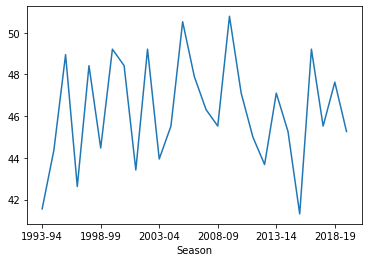

In [181]:
all_seasons = df.groupby("Season").apply(lambda df: (df["FTR"] == "H").mean() * 100)
all_seasons.plot()

## תרגיל 3

### אם קבוצה מסוימת היתה משנה את השם שלה בין העונה 2012/2013 לעונה 2013/2014 איך היינו רואים את זה בנתונים ?

היינו רואים שבעונה 2012/2013 היא נמצאת בליגה ובעונה 2013/2014 כבר לא.
היה יותר קל לזהות את זה אם הקבוצה לא הייתה אמורה לרדת ליגה בעונה 2012/2013 כי אז היינו יודעים שלא בגלל זה היא נעלמה.

## תרגיל 4

האם יש קבוצה שניתן לזהות שהיא שינתה את השם שלה ?

In [182]:
seasons = list(seas_table.groupby("Season"))

for ind, (seasN, season_df) in enumerate(seasons[:-1]):
    seas_teams = set(season_df["Team"].iloc[:-3])
    next_seas_teams = set(seasons[ind + 1][1]["Team"])
    
    gone_teams = seas_teams.difference(next_seas_teams)
    
    for gone_team in gone_teams:
        for new_team in next_seas_teams.difference(seas_teams):
            played_parallel = seas_table.groupby("Season").apply(lambda df: {gone_team, new_team} <= set(df["Team"]))
            
            if not played_parallel.any():
                print(gone_team, ':', new_team)

Middlesbrough : Barnsley
Sheffield United : Derby
Sheffield United : Sunderland
Sheffield United : Birmingham
Reading : Hull


## תרגיל 5 ו - 6

5. תספור לכל קבוצה, בכמה עונות היא שיחקה
6. מי הן 5 הקבוצות ששיחקו בהכי הרבה עונות?

In [183]:
n_seasons_apear = df.groupby('Season')['HomeTeam'].apply(lambda x: x.drop_duplicates()).value_counts()
print(n_seasons_apear)
print(f"\n\n\nThe 5 teams that have appeared in the most seasons:\n\n{n_seasons_apear.head()}")

Liverpool           27
Everton             27
Chelsea             27
Tottenham           27
Arsenal             27
Man United          27
Newcastle           25
Aston Villa         24
West Ham            24
Man City            22
Southampton         20
Blackburn           17
Sunderland          16
Leicester           14
Fulham              14
Middlesbrough       14
Bolton              13
West Brom           12
Leeds               11
Crystal Palace      10
Stoke               10
Norwich              8
Charlton             8
Wigan                8
Coventry             8
Portsmouth           7
Derby                7
Watford              7
Swansea              7
Sheffield Weds       7
Birmingham           7
Wimbledon            7
QPR                  6
Burnley              6
Wolves               6
Hull                 5
Bournemouth          5
Ipswich              4
Nott'm Forest        4
Brighton             3
Sheffield United     3
Reading              3
Huddersfield         2
Bradford   

## תרגיל 7

האם יש עונות שחונות בשערים ? תשרטט את כמות השערים הכוללת בעונה לאורך השנים.

<AxesSubplot:xlabel='Season'>

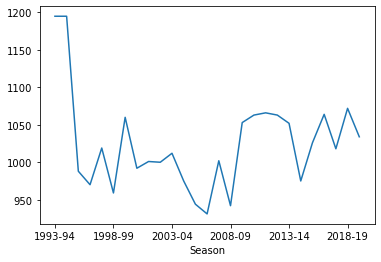

In [184]:
all_seasons = df.groupby('Season').apply(lambda df: (df['FTHG'] + df['FTAG']).sum())
all_seasons.plot()

## תרגיל 8

האם יש לקבוצות נטייה להבקיע יותר/פחות שערים במחזורים מסוימים ?
שרטט על גרף אחד את התפלגות כמות השערים במחזורים.
כלומר, תשרטט גרף התפלגות אחד לכל  שלושה מחזורים עוקבים.

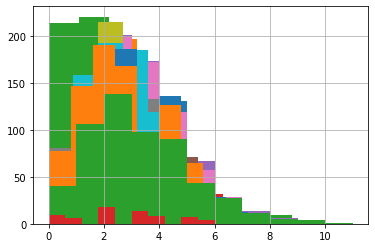

In [6]:
seasons = df.groupby("Season")

# יצירת עמודה המכילה את מס' המחזור של אותו משחק
all_cycly = []
for seasonName, season in seasons:
    n_teams = season["AwayTeam"].nunique()

    e = list(range(1, (n_teams - 1) * 2 + 1)) * int(n_teams / 2)
    e.sort()
    
    all_cycly = all_cycly + e


df["Cycle"] = all_cycly
##

df["group"] = list((df["Cycle"] - 1) // 3 + 1)

groups = df.groupby("group").apply(lambda df: df['FTHG'] + df['FTAG']).groupby('group').hist()

## תרגיל 9

האם בכל עונה יש את אותה כמות המחזורים ?

In [7]:
df.groupby('Season')['Cycle'].nunique().nunique() == 1

False

## תרגיל 10

כמה קבוצות שיחקו בליגה לאורך השנים ?

In [9]:
df["AwayTeam"].nunique()

49

## תרגיל 11

כמה מחזורים יש בכל עונה ?

In [10]:
df.groupby("Season")["Cycle"].nunique()

Season
1993-94    42
1994-95    42
1995-96    38
1996-97    38
1997-98    38
1998-99    38
1999-00    38
2000-01    38
2001-02    38
2002-03    38
2003-04    38
2004-05    38
2005-06    38
2006-07    38
2007-08    38
2008-09    38
2009-10    38
2010-11    38
2011-12    38
2012-13    38
2013-14    38
2014-15    38
2015-16    38
2016-17    38
2017-18    38
2018-19    38
2019-20    38
Name: Cycle, dtype: int64

## תרגיל 12

האם יש קבוצות שהשתתפו בעונה מסוימת, אבל לא שיחקו בה בכל המחזורים ? 

In [189]:
teamseas = seas_table.groupby('Season')['Team']

for seas, seas_teams in teamseas:
    seas_games = df[df['Season'] == seas]
    for team in seas_teams:
        n_team_games = (seas_games['HomeTeam'] == team).sum() + (seas_games['AwayTeam'] == team).sum()
        
        if n_team_games != (len(seas_teams) - 1) * 2:
            print(f'in season {seas} {team} played {n_team_games - (len(seas_teams) - 1) * 2} games more\less from what they were supposed to')

## תרגיל 13

תחשב לכל משחק, כמה נקודות כל קבוצה צברה במשחק.

In [190]:
Points_colomn = []

for H, A, result in zip(df['HomeTeam'], df['AwayTeam'], df['FTR']):
    if result == 'H':
        Points_colomn.append(f"{H} +3")
    elif result == 'A':
        Points_colomn.append(f"{A} +3")
    else:
        Points_colomn.append(f"Each team +1")

df["Points"] = Points_colomn
df[['Season', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'Points']]

,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Points
0,1993-94,Arsenal,Coventry,0,3,A,Coventry +3
1,1993-94,Aston Villa,QPR,4,1,H,Aston Villa +3
2,1993-94,Chelsea,Blackburn,1,2,A,Blackburn +3
3,1993-94,Liverpool,Sheffield Weds,2,0,H,Liverpool +3
4,1993-94,Man City,Leeds,1,1,D,Each team +1
...,...,...,...,...,...,...,...
10419,2019-20,Leicester,Man United,0,2,A,Man United +3
10420,2019-20,Man City,Norwich,5,0,H,Man City +3
10421,2019-20,Newcastle,Liverpool,1,3,A,Liverpool +3
10422,2019-20,Southampton,Sheffield United,3,1,H,Southampton +3


## 14 תרגיל

תחשב לכל עונה את הניקוד הכולל של כל אחת מהקבוצות. כלומר, עליך לחשב טבלה עם שלוש עמודות - שם הקבוצה שם העונה כמות הניקוד הכוללת של הקבוצה בעונה.

In [198]:
data = {"Season": [], "Team": [], "Points in season": []}

for season, the_season in df.groupby("Season"):
    
    all_teams = list(set(the_season["AwayTeam"]))
    for team in all_teams:
        n_team_wins = len(the_season[((the_season["HomeTeam"] == team) & (the_season["FTR"] == "H")) | ((the_season["AwayTeam"] == team) & (the_season["FTR"] == "A"))])

        n_team_draws = len(the_season[((the_season["HomeTeam"] == team) | (the_season["AwayTeam"] == team)) & (the_season["FTR"] == "D")])
        team_seas_points = n_team_wins * 3 + n_team_draws

        data["Season"].append(season)
        data["Team"].append(team)
        data["Points in season"].append(team_seas_points)

seas_table = pd.DataFrame(data).sort_values(["Season", "Points in season"], ascending=[True, False]).reset_index(drop=True)

seas_table

,Season,Team,Points in season
0,1993-94,Man United,92
1,1993-94,Blackburn,84
2,1993-94,Newcastle,77
3,1993-94,Arsenal,71
4,1993-94,Leeds,70
...,...,...,...
539,2019-20,West Ham,39
540,2019-20,Aston Villa,35
541,2019-20,Watford,34
542,2019-20,Bournemouth,34


## תרגיל 15

בהינתן שקבוצה סיימה בחמישייה הראשונה בעונה x מה הסיכוי שלה לסיים בחמישייה הראשונה בעונה x + 1 ?

In [192]:
all_seasons = list(seas_table.groupby('Season'))

count = 0
for ind, (season, season_table) in enumerate(all_seasons[:-1]):
    leading_seas_teams = set(season_table.head()['Team'])
    
    leading_next_seas_teams = set(all_seasons[ind + 1][1].head()['Team'])
    
    count += len(leading_seas_teams & leading_next_seas_teams)

print(f"{(count / ((len(all_seasons) - 1) * 5)) * 100:.3f}%")

75.385%


## תרגיל 16

נבדוק האם יש קבוצות שנוטות לייצר תוצאות תיקו באופן מיוחד
א. תחשב את הסיכוי של כל קבוצה לייצר תוצאת תיקו
ב. תשרטט את התפלגות הסיכויים 
אם יש קבוצה שחורגת ימינה מההתפלגות הנורמלית, אז ייתכן שהיא באמת נוטה לייצר תוצאות תיקו.

Coventry            31.730769
QPR                 22.457627
Blackburn           26.452599
Sheffield Weds      27.372263
Leeds               25.821596
Tottenham           24.854932
Ipswich             23.125000
Swindon             35.714286
Everton             28.820116
Wimbledon           29.927007
Man United          21.663443
Arsenal             25.435203
Man City            22.156398
Southampton         27.343750
West Ham            25.760870
Chelsea             24.081238
Norwich             28.525641
Newcastle           25.574113
Sheffield United    32.203390
Liverpool           24.564797
Aston Villa         29.565217
Oldham              30.952381
Nott'm Forest       31.410256
Leicester           26.865672
Crystal Palace      23.437500
Bolton              25.910931
Middlesbrough       29.699248
Sunderland          26.151316
Derby               26.315789
Barnsley            13.157895
Charlton            26.973684
Bradford            26.315789
Watford             22.932331
Fulham    

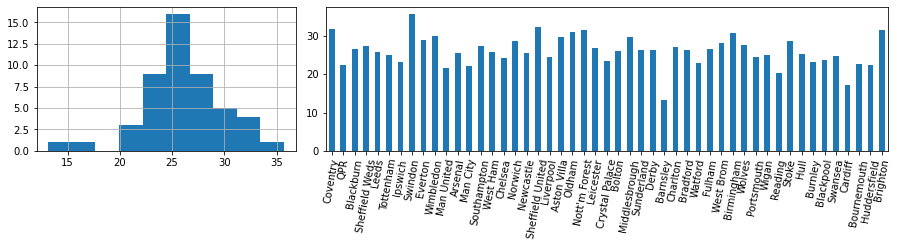

In [193]:
all_teams = dict.fromkeys(list(df["AwayTeam"]))

for team in all_teams:
    team_games = df[(df["AwayTeam"] == team) | (df["HomeTeam"] == team)]
    
    draws_game = team_games[team_games["FTR"] == "D"]
    all_teams[team] = len(draws_game) / len(team_games) * 100

chance_each_team = pd.DataFrame([all_teams]).mean()

print(chance_each_team)

plt.axes([0, 0, 0.6, 0.5])
chance_each_team.hist()

plt.axes([0.67, 0, 1.3, 0.5])
chance_each_team.plot(kind='bar', rot=80)

## תרגיל 17

האם להבקיע כמות מקסימלית של שערים מבטיח מקום ראשון בליגה ?
תחשב מי הקבוצה שהבקיעה הכי הרבה שערים בכל עונה.
תבדוק  כמה מתוכן סיימו ראשונות

In [194]:
all_seasons = list(seas_table.groupby('Season'))
count = 0
for seas, sea_table in all_seasons:
    team_win = seas_table['Team'].iloc[0]
    
    seas_game = df[df['Season'] == seas]
    teams_golls = {}
    
    for team in sea_table['Team']:
        teams_golls[team] = seas_game[seas_game['HomeTeam'] == team]['FTHG'].sum() + seas_game[seas_game['AwayTeam'] == team]['FTAG'].sum()
    
    teams_golls = sorted(teams_golls.items(), key=lambda x: x[1], reverse=True)
    
    count += teams_golls[0][0] == team_win

print(f'{count} from {len(all_seasons)}')

11 from 27


## תרגיל 18

בהינתן שקבוצה מנצחת שני משחקים ברצף, מה הסיכוי שלה לנצח את המשחק שלאחר מכן ?

In [195]:
all_teams = list(dict.fromkeys(df['HomeTeam']))

two_in_row = 0
three_in_row = 0

for team in all_teams:
    team_games = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]['Points'].reset_index(drop=True)
    
    for fir_ind in range(len(team_games) - 3):
        bool_s = team + ' +3' == team_games.iloc[fir_ind] and team + ' +3' == team_games.iloc[fir_ind + 1]
        two_in_row += bool_s
        three_in_row += bool_s and team + ' +3' == team_games.iloc[fir_ind + 2]

print(f'{three_in_row / two_in_row * 100:.5f}%')

46.78606%


## תרגיל 19

###### X אם במחזור
###### קבוצה הפסידה משחק וקבוצה אחרת ניצחה משחק,
###### X+1 והן נפגשות במחזור
###### מה הסיכוי של כל אחת מהן לנצח ?

In [196]:
# (שימוש בעמודה שנוצרה בתרגיל 13 (עמודה של כמה נקודות כל קבוצה הרוויחה במשחק) כדי ליצר עוד עמודה המכילה את הקבוצה המנצחת (אם יש ואם לא להשאיר ריק
df['TeamWin'] = df['Points'].apply(lambda x: x.replace(' +3', '') if x.endswith('+3') else None)

cycles = list(df.groupby('Cycle'))

two_team_meet_like_that = 0
the_lost_wins = 0
the_win_wins = 0

for ind, (cycle_n, cycle) in enumerate(cycles[1:]):
    last_cycle = cycles[ind][1]
    
    for game in cycle.iloc:
        home = game.loc['HomeTeam']
        away = game.loc['AwayTeam']
        
        if_home_last_win = home in list(last_cycle['TeamWin'])
        if_away_last_win = away in list(last_cycle['TeamWin'])
        
        if not(if_home_last_win ^ if_away_last_win) or (game['FTR'] == 'D'):
            continue
        
        two_team_meet_like_that += 1
        
        if if_home_last_win:
            win_last = home
        else:
            win_last = away
        
        if game.loc['TeamWin'] == win_last:
            the_win_wins += 1
        else:
            the_lost_wins += 1

print(f'The team that win in the last cycle have {the_win_wins / two_team_meet_like_that * 100:.5f}% to win.')
print(f'And The team that win in the last cycle have {the_lost_wins / two_team_meet_like_that * 100:.5f}% to win.')

The team that win in the last cycle have 64.69719% to win.
And The team that win in the last cycle have 35.30281% to win.


### פתרון שני לתרגיל 19, לא הייתי בטוח איזה אחד עדיף אז שמתי את שניהם.

In [197]:
df['TeamWin'] = df['Points'].apply(lambda x: x.replace(' +3', '') if x.endswith('+3') else None)

cycles = list(df.groupby('Cycle'))

answer = []

for ind, (cycle_n, cycle) in enumerate(cycles[1:]):
    last_cycle = cycles[ind][1]
    
    for game in cycle.iloc:
        home = game.loc['HomeTeam']
        away = game.loc['AwayTeam']
        
        if_home_last_win = home in list(last_cycle['TeamWin'])
        if_away_last_win = away in list(last_cycle['TeamWin'])
        
        if not(if_home_last_win ^ if_away_last_win) or (game['FTR'] == 'D'):
            continue
        
        if if_home_last_win:
            win_last = home
            loos_last = away
        else:
            win_last = away
            loos_last = home
        
        if game.loc['TeamWin'] == win_last:
            answer.append('The team that win in the last cycle')
        else:
            answer.append('The team that lost in the last cycle')
print(pd.Series(answer, name='chance to win (%)').value_counts(normalize=True) * 100)

The team that win in the last cycle     64.697194
The team that lost in the last cycle    35.302806
Name: chance to win (%), dtype: float64
